# Initial Setup

First, we will create the Perceptron class, using the code provided from the book. The one change we make is to add a "printEvery" parameter to the fit method. This will let us see the change in weights with each iteration if we want, by setting the parameter to a number, which tells how many epochs to run before printing out the weights.

In [2]:
import numpy as np


class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y, printEvery=0):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        if (printEvery > 0):
            print("0", ": " , self.w_)

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            if (printEvery > 0 and ((_+1) % printEvery == 0)):
                print(_+1, ": " , self.w_)                
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Next, we will create the Adaline class, again from code provided by the book. We again add the "printEvery" parameter to the fit method.

In [3]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y, printEvery=0):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        if (printEvery > 0):
            print("0", ": " , self.w_)

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
            if (printEvery > 0 and ((i+1) % printEvery == 0)):
                print(i+1, ": " , self.w_)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

Now we define the function "plot_decision_regions" using the code provided from the book, which will help us to view the decision regions defined by the models.

In [4]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', 'x', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

Next we download the IRIS dataset from the public website and store it in a pandas dataframe. We print out 5 rows of each Iris type from the dataset to validate it loaded properly.

In [5]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
print(df.head())
print(df.iloc[50:54])
print(df.tail())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
      0    1    2    3                4
50  7.0  3.2  4.7  1.4  Iris-versicolor
51  6.4  3.2  4.5  1.5  Iris-versicolor
52  6.9  3.1  4.9  1.5  Iris-versicolor
53  5.5  2.3  4.0  1.3  Iris-versicolor
       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


# Linearly Separable Classes
## 2 Features
Now, we set our feature matrix (X) and target vector (Y). The instructions are to pick two species of Iris, and 2 of the four features, such that the data sets are linearly separable. We'll choose "setosa" (the first 50 records, whose target value is 0) and "versicolor" (the next 50 records, whose target value is 1). For the features, we'll choose Sepal Length (column 0) and Petal Length (column 2). So, we'll take only the first 100 rows from the two feature and target data set, and only columns 0 and 2 from the feature set. For the target data set, we'll convert "Iris-setosa" to "1" and "Iris-versicolor" to "-1", so that setosa is a "success" for the Perceptron and versicolor is a "fail".

In [28]:
# extract sepal length and petal length
#0=sepal length, 1=sepal width, 2=petal length, 3=petal width
setosa_train = df.iloc[0:35, [0, 2]].values 
versicolor_train = df.iloc[50:85, [0, 2]].values
X_train = np.concatenate([setosa_train, versicolor_train])
#print(X_train)
X_test = np.concatenate([df.iloc[35:50, [0, 2]].values, df.iloc[85:100, [0, 2]].values])
#print(X_test)

# select setosa and versicolor
y_train = np.concatenate([df.iloc[0:35, 4].values, df.iloc[50:85, 4].values])
#print(y_train)
y_train = np.where(y_train == 'Iris-setosa', 1, -1)
y_test = np.concatenate([df.iloc[35:50, 4].values, df.iloc[85:100, 4].values])
y_test = np.where(y_test == 'Iris-setosa', 1, -1)

#print(X_train)
#print(y_train)
#print(y_test)

Next we will plot the data using matplotlib, to show that the data is linearly separable.

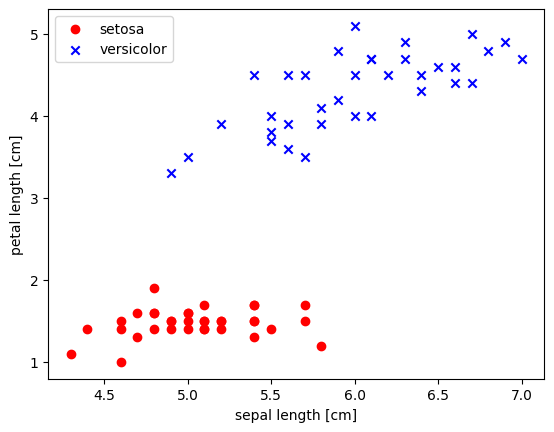

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot data
plt.scatter(X_train[:35, 0], X_train[:35, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X_train[35:70, 0], X_train[35:70, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

## 2 Features - Perceptron
Now we'll apply our Perceptron model to the data. We'll set eta to 0.1, the number of iterations to 10, and set printEvery to 1 to print the weights after each iteration.

0 :  [ 0.01624345 -0.00611756 -0.00528172]
1 :  [ 0.01624345 -0.04829756 -0.07854172]
2 :  [ 0.01624345 -0.09047756 -0.15180172]
3 :  [ 0.03844345 -0.02387756 -0.19398172]
4 :  [ 0.06064345  0.08934244 -0.16290172]


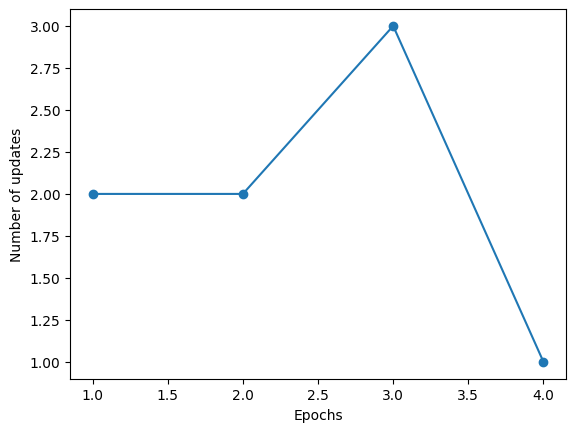

In [61]:
ppn = Perceptron(eta=0.0111, n_iter=4)

ppn.fit(X_train, y_train, printEvery=1)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

We can see that the Perceptron model stabilizes after 5 iterations. Viewing the weights, we can see that w1 is positive; this means that high sepal length compared to petal length is positively related to being setosa. w2 is negative, which means that high petal length compared to sepal length, is negatively related to being setosa.  
Below we view the decision region created by the Perceptron. We can see that it is skewed slightly toward the setosa data, but it cleanly divides the two sets of data.

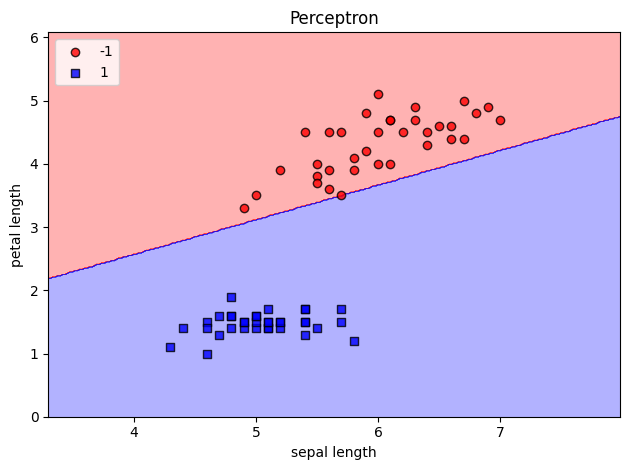

In [62]:
plot_decision_regions(X_train, y_train, classifier=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [63]:
ppn.predict(X_test)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1])

## 2 Features - Adaline
Next we apply the Adaline model to the data. Through trial and error, we find that 0.0001 is a good learning rate. The sum-squared error continues to go down even after 100 epochs, but is beginning to level off.

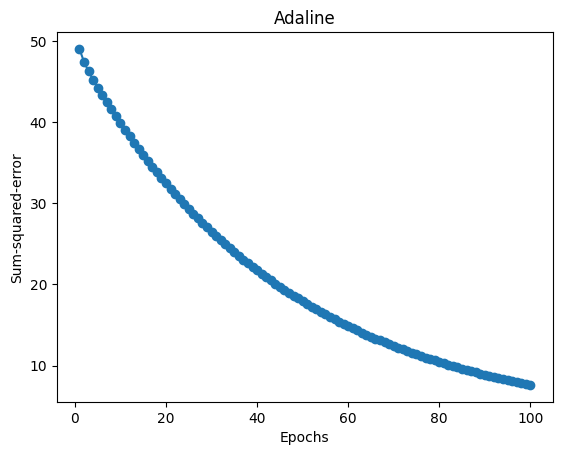

In [13]:
ax = plt.axes()

ada = AdalineGD(n_iter=100, eta=0.0001).fit(X, y)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline')

plt.show()

Next we look at the decision regions created by the Adaline model. We see that the line looks pretty optimal, and cuts about halfway between the two data regions.

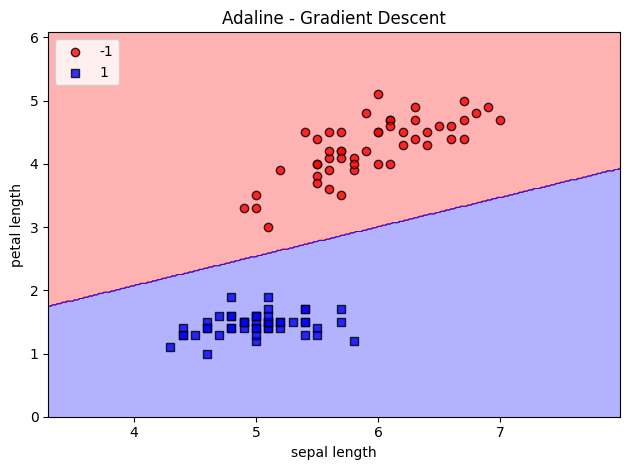

In [14]:
plot_decision_regions(X, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 3 Features
Now we update the feature matrix to include a third feature. We will include sepal width (1) along with sepal length (0) and petal length (2).

In [31]:
# extract sepal length and petal length
#0=sepal length, 1=sepal width, 2=petal length, 3=petal width
X = df.iloc[0:100, [0, 1, 2]].values

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

## 3 Features - Perceptron
Now we apply the Perceptron classifier model, and view the number of updates per epoch. We see that this time the Perceptron model stabilizes even more quickly, after only 4 epochs.

0 :  [ 0.01624345 -0.00611756 -0.00528172 -0.01072969]
1 :  [ 0.01624345 -0.38611756  0.05471828 -0.67072969]
2 :  [ 0.01624345 -0.76611756  0.11471828 -1.33072969]
3 :  [ 0.01624345 -0.86611756  0.23471828 -1.77072969]
4 :  [ 0.21624345  0.15388244  0.93471828 -1.49072969]
5 :  [ 0.21624345  0.15388244  0.93471828 -1.49072969]
6 :  [ 0.21624345  0.15388244  0.93471828 -1.49072969]
7 :  [ 0.21624345  0.15388244  0.93471828 -1.49072969]
8 :  [ 0.21624345  0.15388244  0.93471828 -1.49072969]
9 :  [ 0.21624345  0.15388244  0.93471828 -1.49072969]
10 :  [ 0.21624345  0.15388244  0.93471828 -1.49072969]


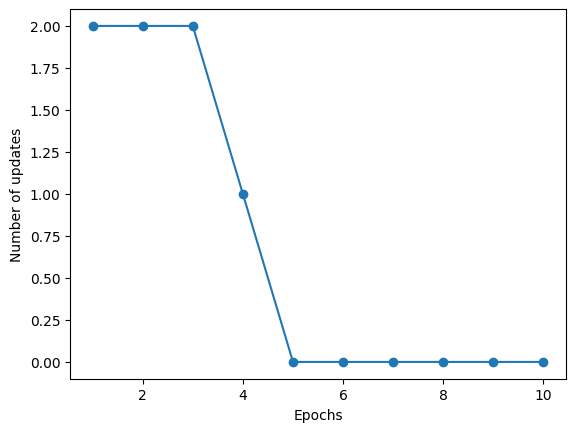

In [32]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y, printEvery=1)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

## 3 Features - Adeline
Now we train the Adeline classified model over the 3 feature set. The graph looks very similar to the 2 feature set, starting to stabilize at about 100 epochs.

0 :  [ 0.01624345 -0.00611756 -0.00528172 -0.01072969]
10 :  [ 0.02585634  0.00454625  0.05401601 -0.10992151]
20 :  [ 0.03484774  0.01829123  0.1065411  -0.19096786]
30 :  [ 0.04246807  0.02992346  0.15075211 -0.2593027 ]
40 :  [ 0.04893188  0.03976984  0.18795329 -0.31692638]
50 :  [ 0.05442088  0.0481108   0.21924663 -0.36552218]
60 :  [ 0.05908822  0.05518269  0.24556094 -0.40650883]
70 :  [ 0.06306298  0.06118475  0.26767905 -0.44108205]
80 :  [ 0.06645397  0.06628487  0.28626074 -0.47024969]
90 :  [ 0.06935287  0.07062457  0.30186211 -0.49486115]
100 :  [ 0.07183698  0.07432314  0.31495184 -0.51563237]


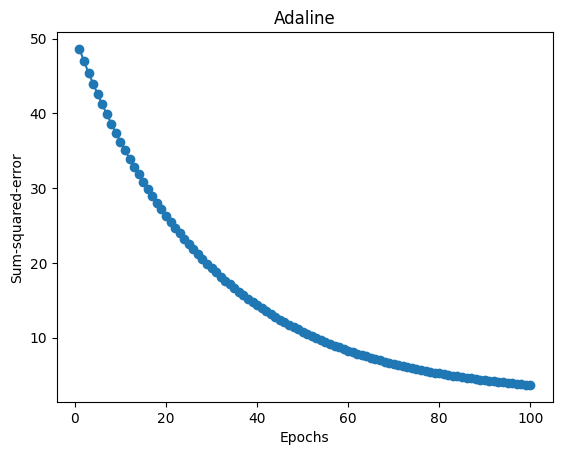

In [34]:
ax = plt.axes()

ada = AdalineGD(n_iter=100, eta=0.0001).fit(X, y, printEvery=10)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline')

plt.show()

## 4 Features
Now we create our feature set to include all four features from the Iris dataset.

In [41]:
# extract sepal length and petal length
#0=sepal length, 1=sepal width, 2=petal length, 3=petal width
X = df.iloc[0:100, [0, 1, 2, 3]].values

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

## 4 Features - Perceptron
Now we apply the Perceptron model to the 4 feature set. We find that it stabilizes even quicker, this time after only 3 epochs.

0 :  [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]
1 :  [ 0.01624345 -0.38611756  0.05471828 -0.67072969 -0.23134592]
2 :  [ 0.01624345 -0.76611756  0.11471828 -1.33072969 -0.47134592]
3 :  [ 0.21624345  0.25388244  0.81471828 -1.05072969 -0.43134592]
4 :  [ 0.21624345  0.25388244  0.81471828 -1.05072969 -0.43134592]
5 :  [ 0.21624345  0.25388244  0.81471828 -1.05072969 -0.43134592]
6 :  [ 0.21624345  0.25388244  0.81471828 -1.05072969 -0.43134592]
7 :  [ 0.21624345  0.25388244  0.81471828 -1.05072969 -0.43134592]
8 :  [ 0.21624345  0.25388244  0.81471828 -1.05072969 -0.43134592]
9 :  [ 0.21624345  0.25388244  0.81471828 -1.05072969 -0.43134592]
10 :  [ 0.21624345  0.25388244  0.81471828 -1.05072969 -0.43134592]


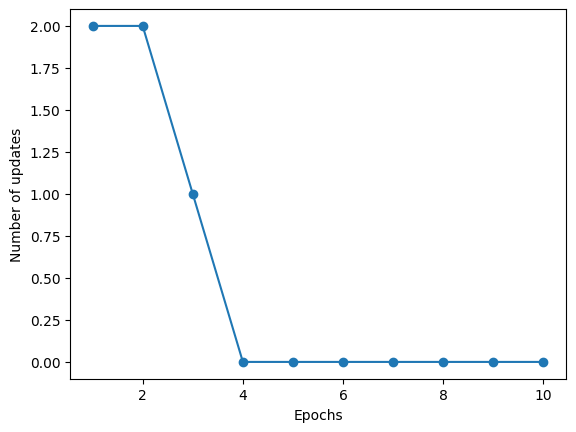

In [42]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y, printEvery=1)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

## 4 Features - Adaline
Now we apply the Adaline model to the 4 feature set. We find that the graph looks almost indistinguishable from the runs with the 2- and 3-feature sets.

0 :  [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]
10 :  [ 0.0262184   0.00678582  0.05498732 -0.10813352 -0.03231587]
20 :  [ 0.03555445  0.0233752   0.10799854 -0.18533355 -0.06533974]
30 :  [ 0.04330159  0.03710715  0.15175265 -0.24908908 -0.09271253]
40 :  [ 0.04973507  0.04847297  0.18785659 -0.30174075 -0.11541749]
50 :  [ 0.05508325  0.0578839   0.21764083 -0.34521923 -0.13426607]
60 :  [ 0.05953479  0.06567967  0.2422045  -0.38111952 -0.14992863]
70 :  [ 0.06324554  0.07214092  0.26245561 -0.41075927 -0.16295897]
80 :  [ 0.06634425  0.07749953  0.27914427 -0.435227   -0.1738146 ]
90 :  [ 0.06893729  0.08194704  0.29289019 -0.45542199 -0.18287346]
100 :  [ 0.07111252  0.08564167  0.3042053  -0.47208713 -0.1904478 ]


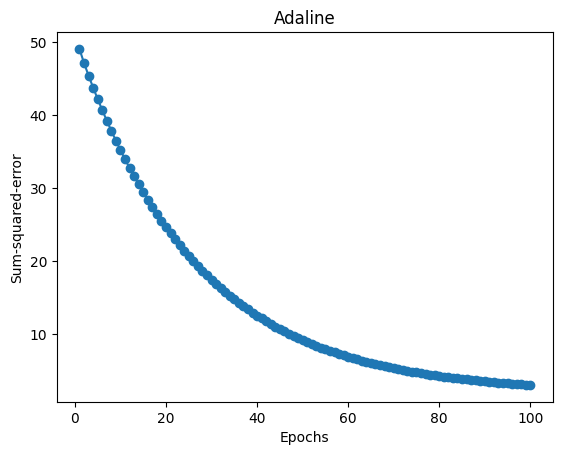

In [43]:
ax = plt.axes()

ada = AdalineGD(n_iter=100, eta=0.0001).fit(X, y, printEvery=10)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline')

plt.show()

# Linearly Inseparable Classes
## 2 Features
Now we will apply the models to a feature set where the data is linearly inseparable. We pick versicolor (rows 50-100) and virginica (rows 100-150) as our classes, and we'll use the same first two features as before (sepal length and petal length). We will set the target value to 1 for versicolor and -1 for virginica.

In [82]:
# extract sepal length and petal length
#0=sepal length, 1=sepal width, 2=petal length, 3=petal width
X = df.iloc[50:150, [0, 2]].values

# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', 1, -1)

As before, we'll plot our data set to visualize it. This time we see that while there is a general separation between the data sets, there is some overlap, so the data classes are not linearly separable.

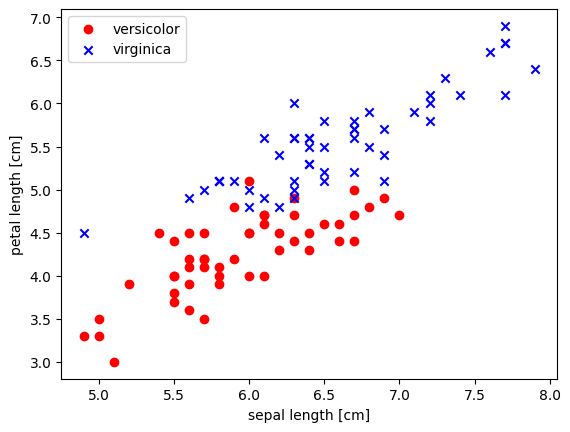

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

## 2 Features - Perceptron
Now we apply the Perceptron model to the linearly inseparable dataset. We run for 100 epochs and print the weights after every 10. We see that the model is constantly updating even to the 100th epoch.

0 :  [ 0.01624345 -0.00611756 -0.00528172]
100 :  [  0.21624345  11.95388244 -18.04528172]
200 :  [  3.81624345  17.63388244 -27.46528172]
300 :  [  9.01624345  21.75388244 -33.00528172]
400 :  [ 14.61624345  24.41388244 -37.12528172]
500 :  [ 19.61624345  25.03388244 -40.54528172]
600 :  [ 25.21624345  26.25388244 -41.76528172]
700 :  [ 30.61624345  26.77388244 -42.72528172]
800 :  [ 35.61624345  26.59388244 -44.04528172]
900 :  [ 40.21624345  26.13388244 -44.18528172]
1000 :  [ 44.61624345  25.45388244 -44.20528172]


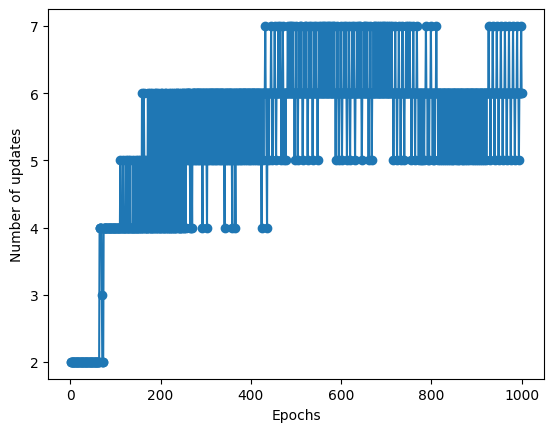

In [84]:
ppn = Perceptron(eta=0.1, n_iter=1000)

ppn.fit(X, y, printEvery=100)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

Below we plot the decision regions that the Perceptron model generated after 100 epochs. It is relatively close to the datasets but classifies too many as virginica (-1).

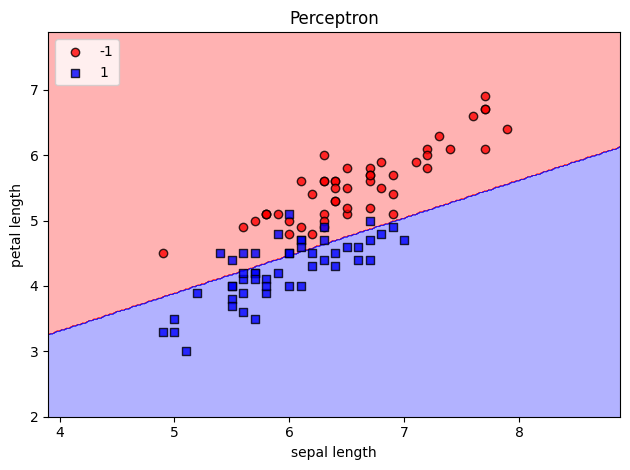

In [85]:
plot_decision_regions(X, y, classifier=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 2 Features - Adaline
Now we train the Adaline model on the linearly inseparable 2 feature set. We find that after 100 epochs, the cost model is still dropping rapidly. Increasing the eta to even 0.001 causes the model to spin out of control, so increasing the eta is not much of an option. We find that leaving eta at 0.0001, the model begins to level out at about 1000 epochs. 

0 :  [ 0.01624345 -0.00611756 -0.00528172]
100 :  [ 0.09103696  0.15848707 -0.23530556]
200 :  [ 0.15809991  0.30190337 -0.43047941]
300 :  [ 0.21808568  0.42448337 -0.59783042]
400 :  [ 0.27197376  0.52918128 -0.74129857]
500 :  [ 0.32060519  0.61853309 -0.86426613]
600 :  [ 0.36470219  0.69471581 -0.96963664]
700 :  [ 0.40488495  0.75959826 -1.0599026 ]
800 :  [ 0.44168606  0.81478468 -1.13720375]
900 :  [ 0.47556294  0.86165221 -1.20337689]
1000 :  [ 0.50690845  0.90138301 -1.25999886]


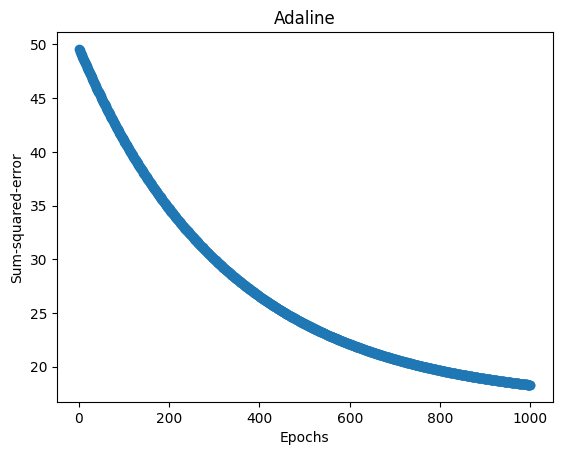

In [86]:
ax = plt.axes()

ada = AdalineGD(n_iter=1000, eta=0.0001).fit(X, y, printEvery=100)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline')

plt.show()

Graphing the decision regions generated by the Adaline model, we find that it divides the data sets pretty well.

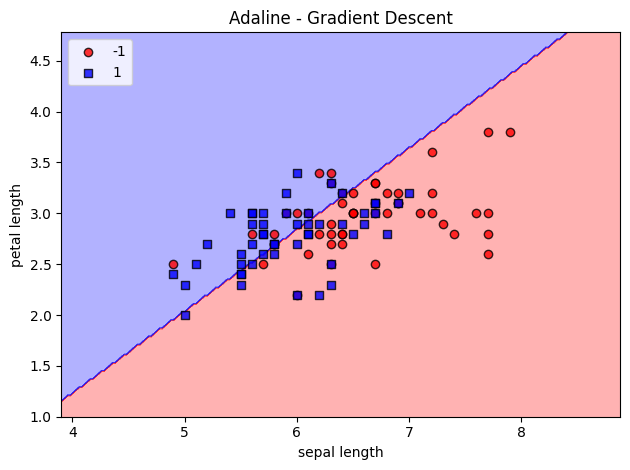

In [78]:
plot_decision_regions(X, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# extract sepal length and petal length
#0=sepal length, 1=sepal width, 2=petal length, 3=petal width
X = df.iloc[50:150, [0, 1, 2]].values

# select setosa and versicolor
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', 1, -1)

In [ ]:
ppn = Perceptron(eta=0.1, n_iter=100)

ppn.fit(X, y, printEvery=10)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [ ]:
ax = plt.axes()

ada = AdalineGD(n_iter=1000, eta=0.0001).fit(X, y, printEvery=100)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline - Learning rate 0.0001')

plt.show()

In [80]:
# extract sepal length and petal length
#0=sepal length, 1=sepal width, 2=petal length, 3=petal width
X = df.iloc[50:150, [0, 1, 2, 3]].values

# select setosa and versicolor
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', 1, -1)

0 :  [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408]
10 :  [ 0.01624345  1.39388244 -0.20528172 -2.61072969 -2.19134592]
20 :  [ 0.01624345  3.09388244 -0.04528172 -4.67072969 -4.03134592]
30 :  [ 0.01624345  5.09388244  0.47471828 -6.19072969 -5.51134592]
40 :  [ 0.01624345  6.11388244  1.29471828 -7.49072969 -6.35134592]
50 :  [ 0.01624345  7.07388244  1.69471828 -8.75072969 -7.27134592]
60 :  [  0.01624345   7.53388244   1.59471828 -10.01072969  -8.53134592]
70 :  [  0.01624345   8.17388244   1.59471828 -11.37072969  -9.91134592]
80 :  [  0.41624345  10.03388244   3.21471828 -11.55072969 -10.41134592]
90 :  [  0.41624345   9.55388244   3.79471828 -13.25072969 -11.59134592]
100 :  [  0.41624345   9.99388244   5.47471828 -14.61072969 -12.47134592]


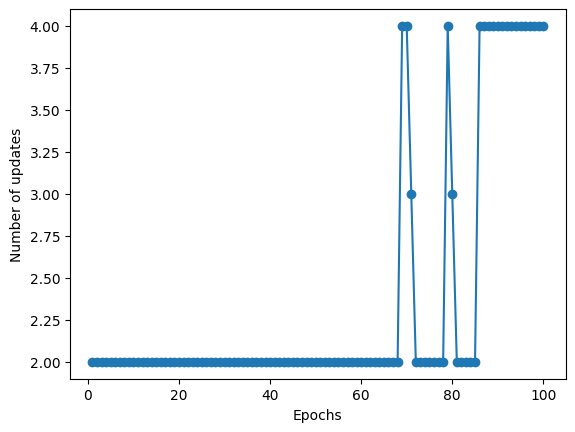

In [81]:
ppn = Perceptron(eta=0.1, n_iter=100)

ppn.fit(X, y, printEvery=10)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [ ]:
ax = plt.axes()

ada = AdalineGD(n_iter=1000, eta=0.0001).fit(X, y, printEvery=100)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline - Learning rate 0.0001')

plt.show()